## Linear Regression

Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:
Age|Wing Length
:-:|:-:
3|1.4
4|1.5
5|2.2
6|2.4
7|3.1
8|3.2
9|3.2
11|3.9
12|4.1
14|4.7
15|4.5
16|5.2
17|5.0

**1. Plot the relationship between Age and Wing Length**

In [110]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import time
from IPython.display import clear_output

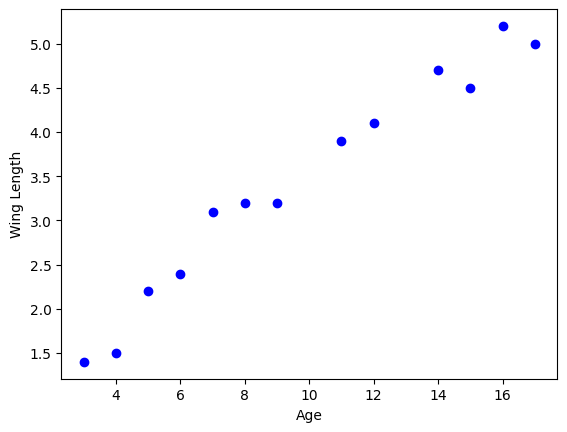

In [111]:
#define dataset
age=[3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing=[1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

#plot
plt.scatter(age, wing, color='blue')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

**2. Calculate and plot the regression line**

LinregressResult(slope=0.2646841206602163, intercept=0.8296243597040407, rvalue=0.9815203776816279, pvalue=3.0097431724571258e-09, stderr=0.015558869602001984, intercept_stderr=0.167740756387387)


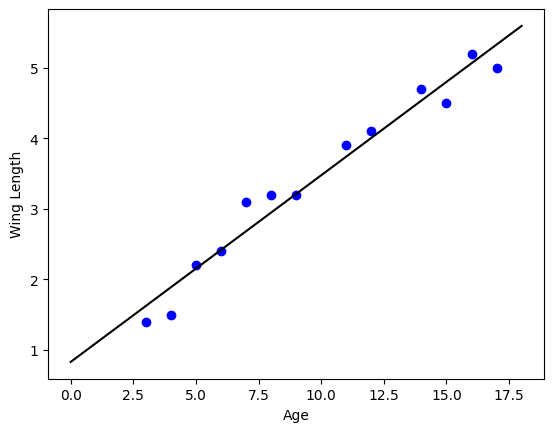

In [112]:
#try linear regression - fit slope and intercept
print(st.linregress(age,wing))
m=st.linregress(age,wing)[0]
b=st.linregress(age,wing)[1]
#define range of possible x's
x_range=np.linspace(0, age[-1]+1, num=100)

#plot
#scatter
plt.scatter(age, wing, color='blue')
#regression
plt.plot(x_range, b + m*x_range, color='black')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

**3. Can you reject H0: b=0?**

In [113]:
#test if slope is significantly different than 0 with ANOVA
age_int = sm.add_constant(age) #intercept
modelfit = sm.OLS(wing,age_int).fit()
print(modelfit.summary())
#extract p from f-test of x1=age weight estimate
modelfit.pvalues[1]

#confirm with f-test given specified contrast of B vs 0
B = np.array(([0,1],[0,0]))
print(modelfit.f_test(B))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.01e-09
Time:                        17:35:47   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/Users/megardn/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/megardn/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Since p< 0.05, we reject the null that Beta=0.

**4. Calculate and plot the confidence intervals on the slope of the regression**

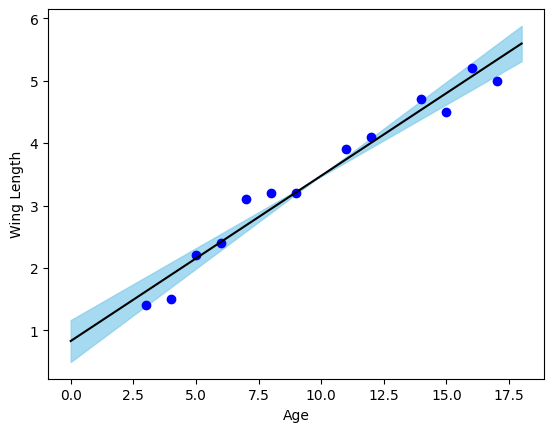

In [114]:
#extract CI for X1 estimate, aka slope since it's a simple linear regression
ci_bounds=modelfit.conf_int(.05)[1]
ci_lower=ci_bounds[0]
ci_upper=ci_bounds[1]
#get intercepts for CI lines
b_lower=np.mean(wing)-ci_lower*np.mean(age)
b_upper=np.mean(wing)-ci_upper*np.mean(age) # intercept for upper CI

#plot
#regression
plt.plot(x_range, b + m*x_range, color='black')
plt.xlabel('Age')
plt.ylabel('Wing Length')
#CI
plt.fill_between(x_range, x_range*ci_lower+b_lower, x_range*ci_upper+b_upper, color = 'skyblue', label = '95% confidence interval', alpha=0.75)
#scatter
plt.scatter(age, wing, color='blue')
plt.show()

**5. Calculate r^2 (the coefficient of determination)**

In [115]:
#just extract from model
print(f"R^2 = {modelfit.rsquared:.4f}")

R^2 = 0.9634


**6. Calculate Pearson's r**

In [116]:
r=np.corrcoef(wing, age)
print(f"r = {r[1,0]:.4f}")

r = 0.9815


**7. Add some noise to the data and see how the regression changes**

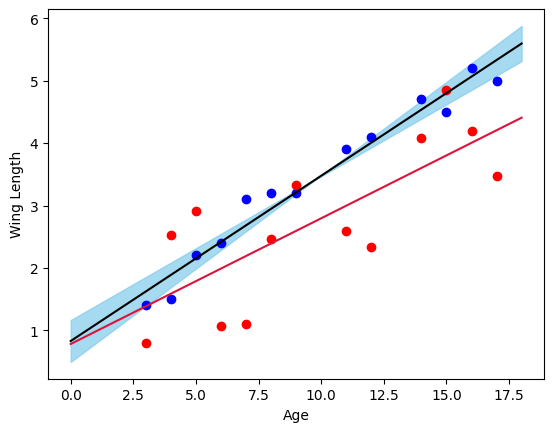

In [118]:
for n in np.arange(5):
    #add noise to wing lengths
    noise = np.random.normal(0,1,len(wing))
    noisy_wing=wing+noise
    #rerun regression to get new intercept and slope
    noisy_m=st.linregress(age,noisy_wing)[0]
    noisy_b=st.linregress(age,noisy_wing)[1]

    #plot both
    #regression
    plt.plot(x_range, b + m*x_range, color='black')
    plt.plot(x_range, noisy_b + noisy_m*x_range, color='crimson')
    plt.xlabel('Age')
    plt.ylabel('Wing Length')
    #CI
    plt.fill_between(x_range, x_range*ci_lower+b_lower, x_range*ci_upper+b_upper, color = 'skyblue', label = '95% confidence interval', alpha=0.75)
    #scatter
    plt.scatter(age, wing, color='blue')
    plt.scatter(age, noisy_wing, color='red')
    plt.show()
    n=n+1
    time.sleep(1)
    clear_output(wait=True)